In [2]:
import numpy as np

In [3]:
np.random.seed(42)

In [17]:
employee_ids=[f"EMP_{i:03d}" for i in range(1,31)]
dates= pd.date_range("2025-07-01",periods=30,freq="D")

In [18]:
data={
    "Date":np.tile(dates, len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids, len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_ids)).round(2)
}        

In [19]:
df=pd.DataFrame(data)

In [22]:
df.to_csv("employee_working_hours.csv", index=False)

In [24]:
df_csv=pd.read_csv("employee_working_hours.csv")

In [25]:
#Analyze the Data
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           6.25
1  2025-07-02     EMP_001           9.70
2  2025-07-03     EMP_001           8.39
3  2025-07-04     EMP_001           7.59
4  2025-07-05     EMP_001           4.94
       Working_Hours
count     900.000000
mean        6.954233
std         1.762088
min         4.030000
25%         5.387500
50%         7.010000
75%         8.490000
max        10.000000
30


In [26]:
#Total hours per employee
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [27]:
#Average daily hours per employee
avg_daily=df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [28]:
#Flag unusually low or high working days
threshold_low=5
threshold_high=9

In [29]:
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"]<threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"]>threshold_high

In [33]:
#view flagged rows
print(df_csv[df_csv["Low_Hour_Flag"]|
df_csv["High_Hour_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02     EMP_001           9.70          False            True
4  2025-07-05     EMP_001           4.94           True           False
5  2025-07-06     EMP_001           4.94           True           False
6  2025-07-07     EMP_001           4.35           True           False
7  2025-07-08     EMP_001           9.20          False            True


In [34]:
#Visualize the Insights
import matplotlib.pyplot as plt
import seaborn as sns

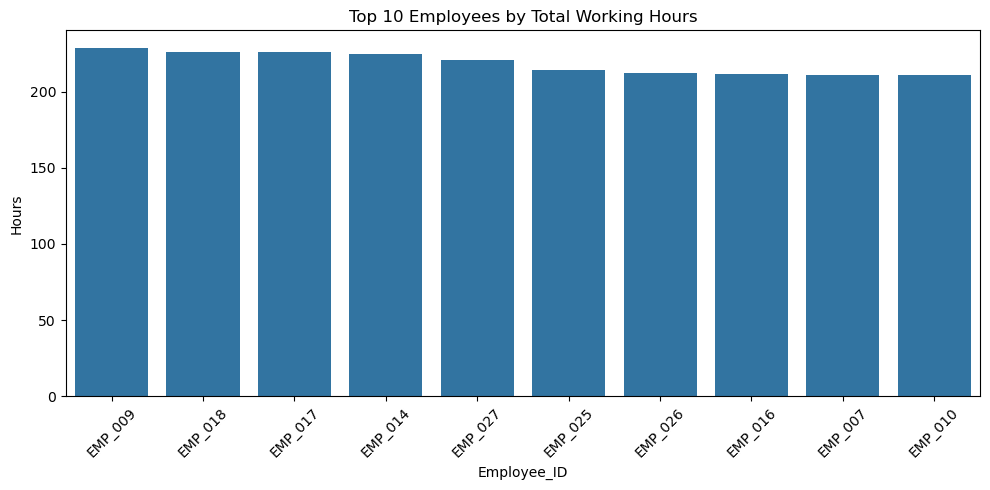

In [35]:
#Bar chart of top 10 employees with highest total hours
top10=total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()